    Distance (cm)  Battery (volts)  Step limit (15-(30-stride)cm)  \
0             8.5             11.0                             15   
1            15.5             11.0                             15   
2            21.5             11.0                             15   
3            29.0             10.9                             15   
4            32.6             10.9                             15   
..            ...              ...                            ...   
79          134.0             12.5                             18   
80           51.0             12.4                             18   
81           85.0             12.3                             18   
82          119.5             12.3                             18   
83          155.0             12.3                             18   

    Stride (1 - 30-steplimit) cm  Stride Count (1 - )  
0                              2                    3  
1                              2                    5  
2  

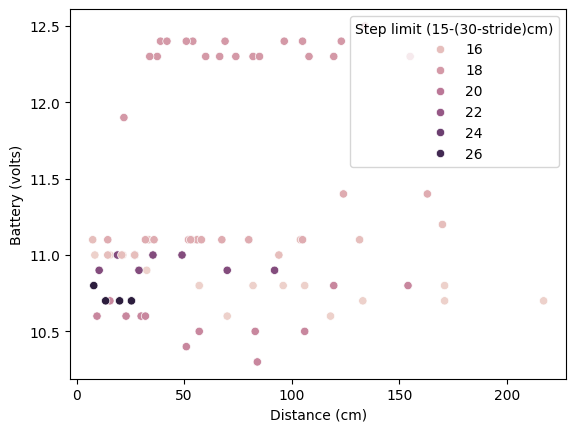

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns


data = pd.read_csv("/Users/sebastienjames/Documents/CS301/Lab3/data.csv")
data.dropna(inplace=True)

sns.scatterplot(data=data, x="Distance (cm)", y="Battery (volts)", hue="Step limit (15-(30-stride)cm)")
print(data)

In [112]:

def get_distance(goal, volt):
    newdata = data[["Distance (cm)", "Battery (volts)"]]
    # newdata = newdata / newdata.sum(axis=0)


    newdata["Distance (cm)"] -= goal
    newdata["Distance (cm)"] *= newdata["Distance (cm)"]
    newdata["Battery (volts)"] -= volt
    newdata["Battery (volts)"] *= newdata["Battery (volts)"]

    newdata["sum"] = newdata["Distance (cm)"] + newdata["Battery (volts)"]
    newdata["sum"] = np.sqrt(newdata["sum"])

    return newdata

goal = 50
volt = 12.3

data["weight"] = 1 / get_distance(goal, volt)["sum"]
data["weight"]= data["weight"] / data["weight"].sum()

data = data.sort_values("weight", ascending=False)

n = 5

data["Step limit (15-(30-stride)cm)"] *= data["weight"]
data["Stride (1 - 30-steplimit) cm"] *= data["weight"]
data["Stride Count (1 - )"] *= data["weight"]

data = data.head(n)
print(data)

weight = data["weight"].sum()
print("Step Limit:", data["Step limit (15-(30-stride)cm)"].sum() / weight)
print("Stride:", data["Stride (1 - 30-steplimit) cm"].sum() / weight)
print("Stride Count:", int(data["Stride Count (1 - )"].sum() / weight))




    Distance (cm)  Battery (volts)  Step limit (15-(30-stride)cm)  \
80           51.0             12.4                       2.689658   
33           49.0             11.0                       2.105896   
24           51.0             10.4                       1.328888   
54           52.0             11.1                       1.094548   
60           53.0             11.1                       0.790103   

    Stride (1 - 30-steplimit) cm  Stride Count (1 - )    weight  
80                      1.494255             0.448276  0.149425  
33                      0.549364             0.457804  0.091561  
24                      0.699415             0.209824  0.069941  
54                      0.257541             0.450696  0.064385  
60                      0.464767             0.139430  0.046477  
Step Limit: 18.98836787540227
Stride: 8.215807026486448
Stride Count: 4


/var/folders/6h/qqw3dy851wxdchg1x48dcf380000gn/T/ipykernel_31818/614521534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["Distance (cm)"] -= goal
/var/folders/6h/qqw3dy851wxdchg1x48dcf380000gn/T/ipykernel_31818/614521534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata["Distance (cm)"] *= newdata["Distance (cm)"]
/var/folders/6h/qqw3dy851wxdchg1x48dcf380000gn/T/ipykernel_31818/614521534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.